In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('notebooks/data/metrics.csv')

metrics = ['CP', 'AA', 'FA', 'KC', 'SC', 'AD']
iterations = ['iter0', 'iter1', 'iter2', 'iter3', 'iter4']

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

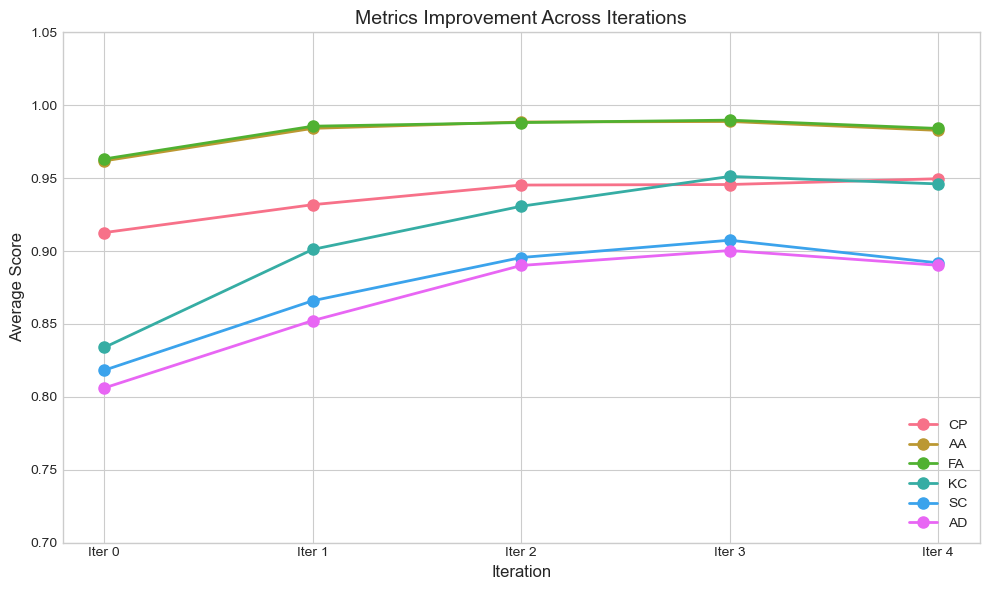

In [2]:
fig, ax = plt.subplots(figsize=(10, 6))

for metric in metrics:
    means = [df[f'{iter}_{metric}'].mean() for iter in iterations]
    ax.plot(range(5), means, marker='o', linewidth=2, markersize=8, label=metric)

ax.set_xticks(range(5))
ax.set_xticklabels(['Iter 0', 'Iter 1', 'Iter 2', 'Iter 3', 'Iter 4'])
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Average Score', fontsize=12)
ax.set_title('Metrics Improvement Across Iterations', fontsize=14)
ax.legend(loc='lower right')
ax.set_ylim(0.7, 1.05)
plt.tight_layout()
plt.show()

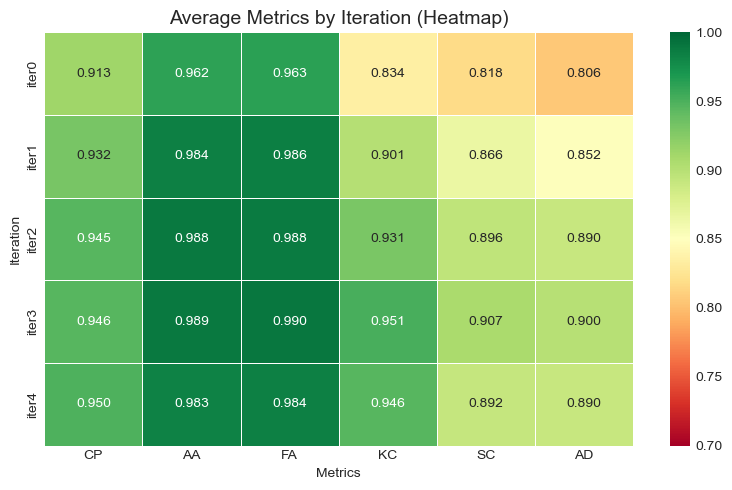

In [3]:

summary_data = []
for iter in iterations:
    row = {metric: df[f'{iter}_{metric}'].mean() for metric in metrics}
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data, index=iterations)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(summary_df, annot=True, fmt='.3f', cmap='RdYlGn', 
            vmin=0.7, vmax=1.0, linewidths=0.5, ax=ax)
ax.set_title('Average Metrics by Iteration (Heatmap)', fontsize=14)
ax.set_xlabel('Metrics')
ax.set_ylabel('Iteration')
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('notebooks/data/metrics.csv')

metrics = ['CP', 'AA', 'FA', 'KC', 'SC', 'AD']
iterations = ['iter0', 'iter1', 'iter2', 'iter3', 'iter4']

best_iter_counts = {metric: {iter: 0 for iter in iterations} for metric in metrics}

for idx, row in df.iterrows():
    for metric in metrics:
        values = {iter: row.get(f'{iter}_{metric}', np.nan) for iter in iterations}
        max_val = max(v for v in values.values() if pd.notna(v))
        best_iters = [iter for iter, v in values.items() if v == max_val]
        for best_iter in best_iters:
            best_iter_counts[metric][best_iter] += 1

result_df = pd.DataFrame(best_iter_counts).T
print(result_df)
print()

total_articles = len(df)
result_pct = result_df / result_df.sum(axis=1).values.reshape(-1, 1) * 100
print(result_pct.round(1))

    iter0  iter1  iter2  iter3  iter4
CP     54     71     82     86     96
AA    146    164    165    163    160
FA    147    165    163    161    160
KC     46     72     97    118    124
SC     37     58     80     94     81
AD     40     54     76     89     83

    iter0  iter1  iter2  iter3  iter4
CP   13.9   18.3   21.1   22.1   24.7
AA   18.3   20.6   20.7   20.4   20.1
FA   18.5   20.7   20.5   20.2   20.1
KC   10.1   15.8   21.2   25.8   27.1
SC   10.6   16.6   22.9   26.9   23.1
AD   11.7   15.8   22.2   26.0   24.3


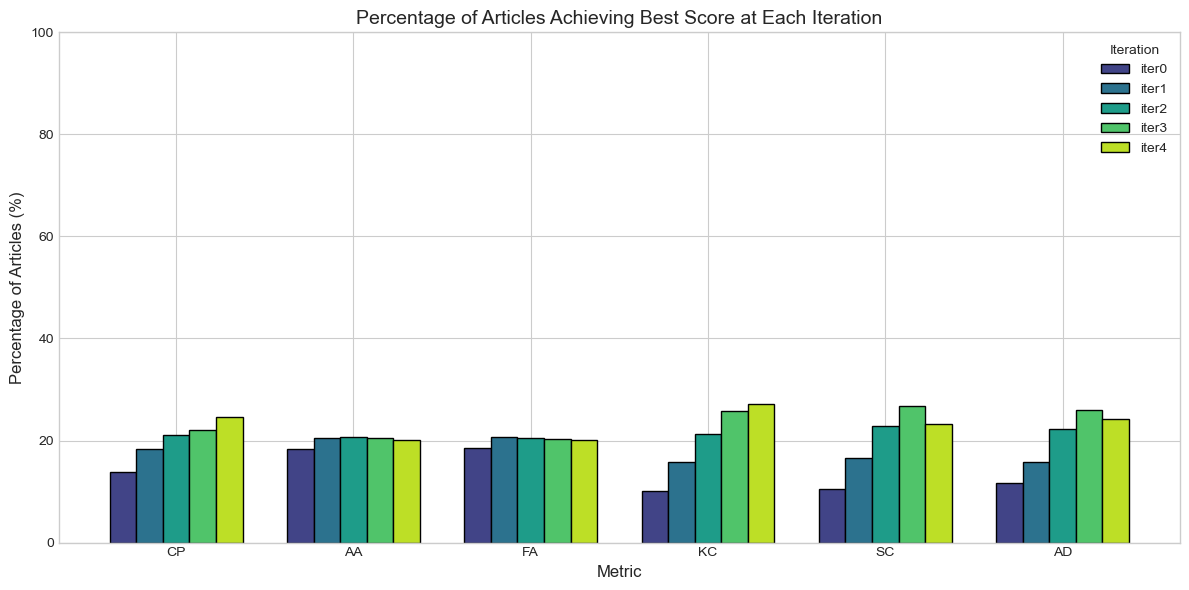

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.15
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(iterations)))

for i, iter in enumerate(iterations):
    counts = [best_iter_counts[metric][iter] for metric in metrics]
    pcts = [c / result_df.loc[metric].sum() * 100 for c, metric in zip(counts, metrics)]
    bars = ax.bar(x + i * width, pcts, width, label=iter, color=colors[i], edgecolor='black')

ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Percentage of Articles (%)', fontsize=12)
ax.set_title('Percentage of Articles Achieving Best Score at Each Iteration', fontsize=14)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metrics)
ax.legend(title='Iteration')
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [6]:
summary = []
for metric in metrics:
    counts = best_iter_counts[metric]
    best_iter = max(counts, key=counts.get)
    best_count = counts[best_iter]
    total = sum(counts.values())
    summary.append({
        'Metric': metric,
        'Most Frequent Best Iter': best_iter,
        'Count': best_count,
        'Percentage': f'{best_count/total*100:.1f}%'
    })

summary_df = pd.DataFrame(summary)
print("Each metrics achive highest score in Iteration：")
print(summary_df.to_string(index=False))

Each metrics achive highest score in Iteration：
Metric Most Frequent Best Iter  Count Percentage
    CP                   iter4     53      23.8%
    AA                   iter2     93      21.0%
    FA                   iter1     93      21.0%
    KC                   iter4     68      25.5%
    SC                   iter3     50      25.4%
    AD                   iter3     47      24.1%
